                                            Assignment-1

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
from pathlib import Path
from skimage import filters
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from skimage import data, exposure, img_as_float
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
from skimage.feature import hog

In [5]:
#1)image Processing

#i. Choose 2 images from each class.

def collect_image_paths(directory, max_images_per_folder=2):
    image_paths = []
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            images = os.listdir(folder_path)
            cropped_images = [image for image in images if image.lower().endswith('.jpg')][:max_images_per_folder]
            for image in cropped_images:
                image_path = os.path.join(folder_path, image)
                image_paths.append(image_path)
    return image_paths


cropped_images_dir = 'crop_images'
image_paths = collect_image_paths(cropped_images_dir)
print(image_paths)


['crop_images\\n02096177-cairn\\n02096177_1000_resize.jpg', 'crop_images\\n02096177-cairn\\n02096177_10031_resize.jpg', 'crop_images\\n02096294-Australian_terrier\\n02096294_1111_resize.jpg', 'crop_images\\n02096294-Australian_terrier\\n02096294_1121_resize.jpg', 'crop_images\\n02100735-English_setter\\n02100735_10030_resize.jpg', 'crop_images\\n02100735-English_setter\\n02100735_10038_resize.jpg', 'crop_images\\n02111500-Great_Pyrenees\\n02111500_1031_resize.jpg', 'crop_images\\n02111500-Great_Pyrenees\\n02111500_1048_resize.jpg']


crop_images\n02096177-cairn\n02096177_1000_resize.jpg


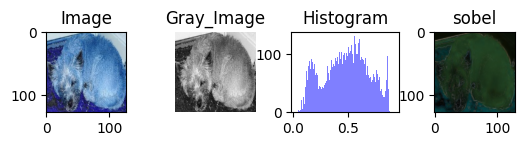

crop_images\n02096177-cairn\n02096177_10031_resize.jpg


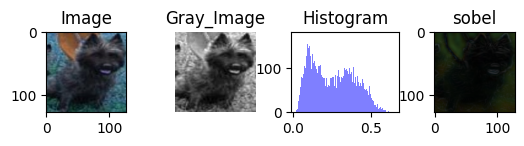

crop_images\n02096294-Australian_terrier\n02096294_1111_resize.jpg


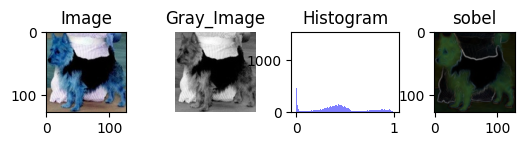

crop_images\n02096294-Australian_terrier\n02096294_1121_resize.jpg


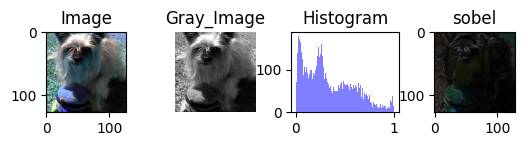

crop_images\n02100735-English_setter\n02100735_10030_resize.jpg


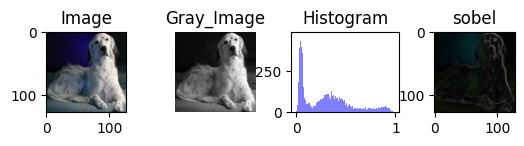

crop_images\n02100735-English_setter\n02100735_10038_resize.jpg


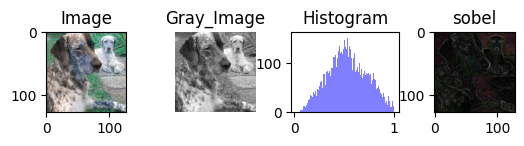

crop_images\n02111500-Great_Pyrenees\n02111500_1031_resize.jpg


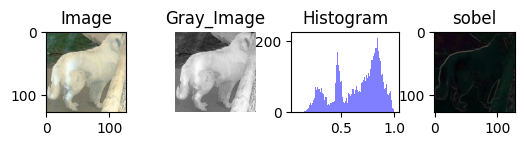

crop_images\n02111500-Great_Pyrenees\n02111500_1048_resize.jpg


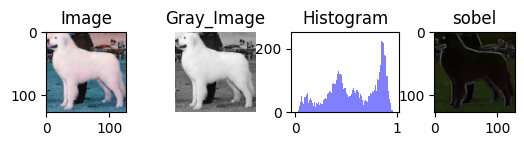

In [11]:
# ii. Convert the color images to grayscale images (see https://scikit-image.org/docs/
 #stable/auto_examples/color_exposure/plot_rgb_to_gray.html)
# iii. Plot the 8 grayscale images with their corresponding pixel intensity histograms (i.e., 256 bins)

 #iv.Using the 8 grayscale images above, perform edge detection (see https://scikit-image.
 #org/docs/stable/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py
 #using the sobel edge filter.
 #v. Plot the 8 edge images as shown in https://scikit-image.org/docs/stable/auto_
 #examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-fil


for dog_path in image_paths:
    image = cv2.imread(dog_path)
    grey_image = rgb2gray(image)
    sobel_image = filters.sobel(image)
    print(dog)
    fig = plt.figure()
    fig.add_subplot(441)
    plt.title('Image')
    plt.imshow(image)
    fig.add_subplot(442)
    plt.title('Gray_Image')
    plt.imshow(grey_image, cmap=plt.get_cmap('gray')) 
    plt.axis('off')
    fig.add_subplot(443)
    plt.title('Histogram')
    plt.hist(grey_image.ravel(), bins=256, color='b', alpha=0.5)
    fig.add_subplot(444)
    plt.title('sobel')
    plt.imshow(sobel_image,cmap=plt.get_cmap('gray'))
    plt.show()

crop_images\n02096177-cairn\n02096177_1000_resize.jpg


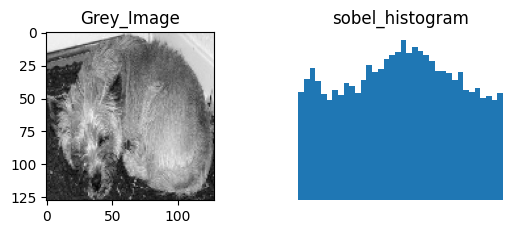

crop_images\n02096294-Australian_terrier\n02096294_1111_resize.jpg


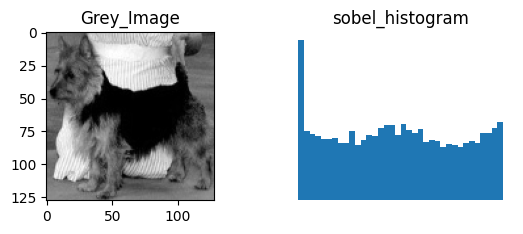

crop_images\n02100735-English_setter\n02100735_10030_resize.jpg


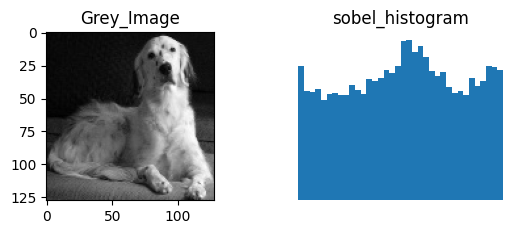

crop_images\n02111500-Great_Pyrenees\n02111500_1031_resize.jpg


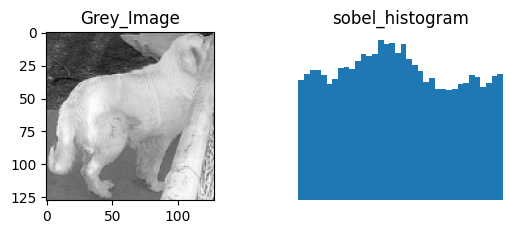

In [14]:
# (c) Edge histogram



# i. Choose 1 image from each class.

image_pth=collect_image_paths('crop_images',1)

# ii. Convert the color images to grayscale images

# iii. For each image 𝐼, use the following

def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)
#angle_sobel = angle(filters.sobel_h(I),filters.sobel_v(I))

# iv. Useskimage.exposure.histogram(seehttps://scikit-image.org/docs/stable/api/
# skimage.exposure.html#skimage.exposure.histogram)toobtainahistogramwith36 bins. (1 point)
# v. Plot the images with their corresponding edge histogram values (add x-axis label “Bins” and  y-axis label “Pixel Count” ).


for dog_im in image_pth:
    dog = cv2.imread(dog_im)
    dog_grey = rgb2gray(dog)
    angle_sobel = angle(filters.sobel_h(dog_grey),filters.sobel_v(dog_grey))
    hist,_=exposure.histogram(angle_sobel, nbins=36)
    print(dog_im)
    fig = plt.figure()
    fig.add_subplot(221)
    plt.title('Grey_Image')
    plt.imshow(dog_grey, cmap=plt.get_cmap('gray'))
    fig.add_subplot(222)
    plt.title('sobel_histogram')
    plt.bar(np.arange(len(hist)), hist, width=1) 
    plt.xlabel('Bins')
    plt.ylabel('pixel_count')
    plt.axis('off')
    plt.show()

In [31]:
# (d) HistogramComparison(MeasuresofSimilarityandDissimilarity)

# ref: (see https://scikit-learn. org/stable/modules/classes.html#module-sklearn.metrics.pairwise)

#i. Pick 2 images from the same class and 1 image from another class.

dog_paths=['crop_images\\n02096177-cairn\\n02096177_1000_resize.jpg', 
           'crop_images\\n02096177-cairn\\n02096177_10031_resize.jpg',
           'crop_images\\n02096294-Australian_terrier\\n02096294_1111_resize.jpg']


# ii. Convert the three images to edge histograms. (These will be the vector representations of the  images)

edge_histograms=[]
for dog_im in dog_paths:
    dog_im = cv2.imread(dog_im)
    dog_grey = rgb2gray(dog_im)
    angle_sobel = angle(filters.sobel_h(dog_grey),filters.sobel_v(dog_grey))
    hist,_=exposure.histogram(angle_sobel, nbins=36)
    edge_histograms.append(hist)

# iii. Perform histogram comparison using the following metrics/measures.
# • Euclidean distance 2 • Manhattan distance  • Cosine distance
# Using the 3 images above, you will compare histograms by computing the metrics/measures  of (1) the 2 images from the same class, AND (2) 2 images from different classes.

hist1=edge_histograms[0]
hist2=edge_histograms[1]
hist3=edge_histograms[2]




In [27]:
print("Cosine distance of same class , different class ")
cosine_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0] , cosine_distances(hist1.reshape(1, -1), hist3.reshape(1, -1))[0][0]


Cosine distance of same class , different class 


(0.020562583964849113, 0.04119996585911201)

In [29]:
print("Euclidean distances of same class , different class ")
euclidean_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0] , euclidean_distances(hist1.reshape(1, -1), hist3.reshape(1, -1))[0][0]


Euclidean distances of same class , different class 


(557.8135889345114, 802.7926257757978)

In [30]:
print("manhattan_distances of same class , different class ")
manhattan_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0] , manhattan_distances(hist1.reshape(1, -1), hist3.reshape(1, -1))[0][0]


manhattan_distances of same class , different class 


(2910.0, 2632.0)

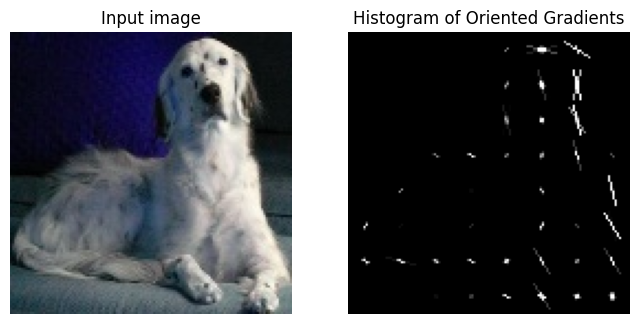

In [42]:
#(e) Histogram of Oriented Gradient (HOG) feature descriptor (see https://en.wikipedia. org/wiki/Histogram_of_oriented_gradients)


# i. Pick 1 image and compute its HOG descriptors. Visualise the image and the HOG descriptors  fortheimage(seehttps://scikit-image.org/docs/stable/auto_examples/features_
# detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 


path='crop_images\\n02100735-English_setter\\n02100735_10030_resize.jpg'
image = cv2.imread(path)


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(9, 17))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

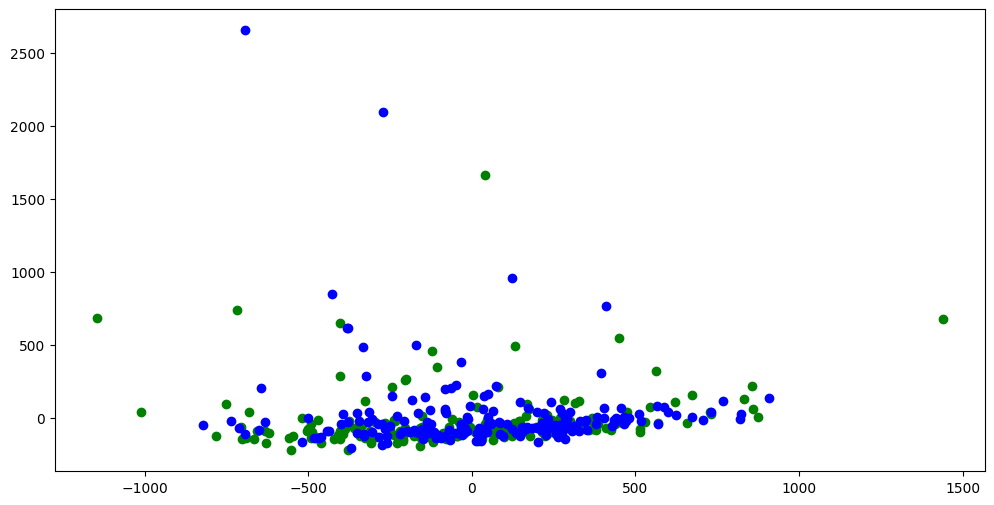

In [44]:
# (f) Dimensionalityreduction(usingPrincipalComponentAnalysis,PCA)(seehttps://scikit-learn. org/stable/modules/generated/sklearn.decomposition.PCA.htmlforPCA.https://
 # scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
    
# i. Use images from any two classes.
# ii. Convert all the images from the two classes to edge histograms.(0.5 points)
 
cls_1 = r"crop_images\\n02096177-cairn"
cls_2 = r"crop_images\\n02096294-Australian_terrier"
pca_hist=[]

cls_1_images = [os.path.join(cls_1, filename) for filename in os.listdir(cls_1)]
cls_2_images = [os.path.join(cls_2, filename) for filename in os.listdir(cls_2)]
files = [file for file in cls_1_images + cls_2_images]
#len(cls_1_images), len(cls_2_images)
for image in files:
    img = cv2.imread(image)
    gray_img = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
    hist,_=exposure.histogram(angle_sobel, nbins=36)
    pca_hist.append(hist)
c1= len(cls_1_images)
c2= len(cls_2_images)
pca_transfer= PCA(n_components=2)
pc= pca_transfer.fit_transform(pca_hist)
plt.figure(figsize=(12, 6))
plt.scatter(pc[:c1, 0], pc[:c1, 1], c='g')
plt.scatter(pc[c1:, 0], pc[c1:, 1], c='b')

plt.show()


In the figure there are two different classes refered with two different colours. overall there are so many points that are intersected ,thus we can conclude that data is not seperable.